### Maximum Likelihood Estimation 최대우도추정법
- <b>우도(사건이 일어날 확률의 가능도)</b>의 최대화 관점에서 Cost Function 정의하기
- Y값 0 or 1로 이산확률 변수 → "베르누이의 분포"
- 우도 : p<sup>y</sup>(1-p)<sup>1-y</sup>
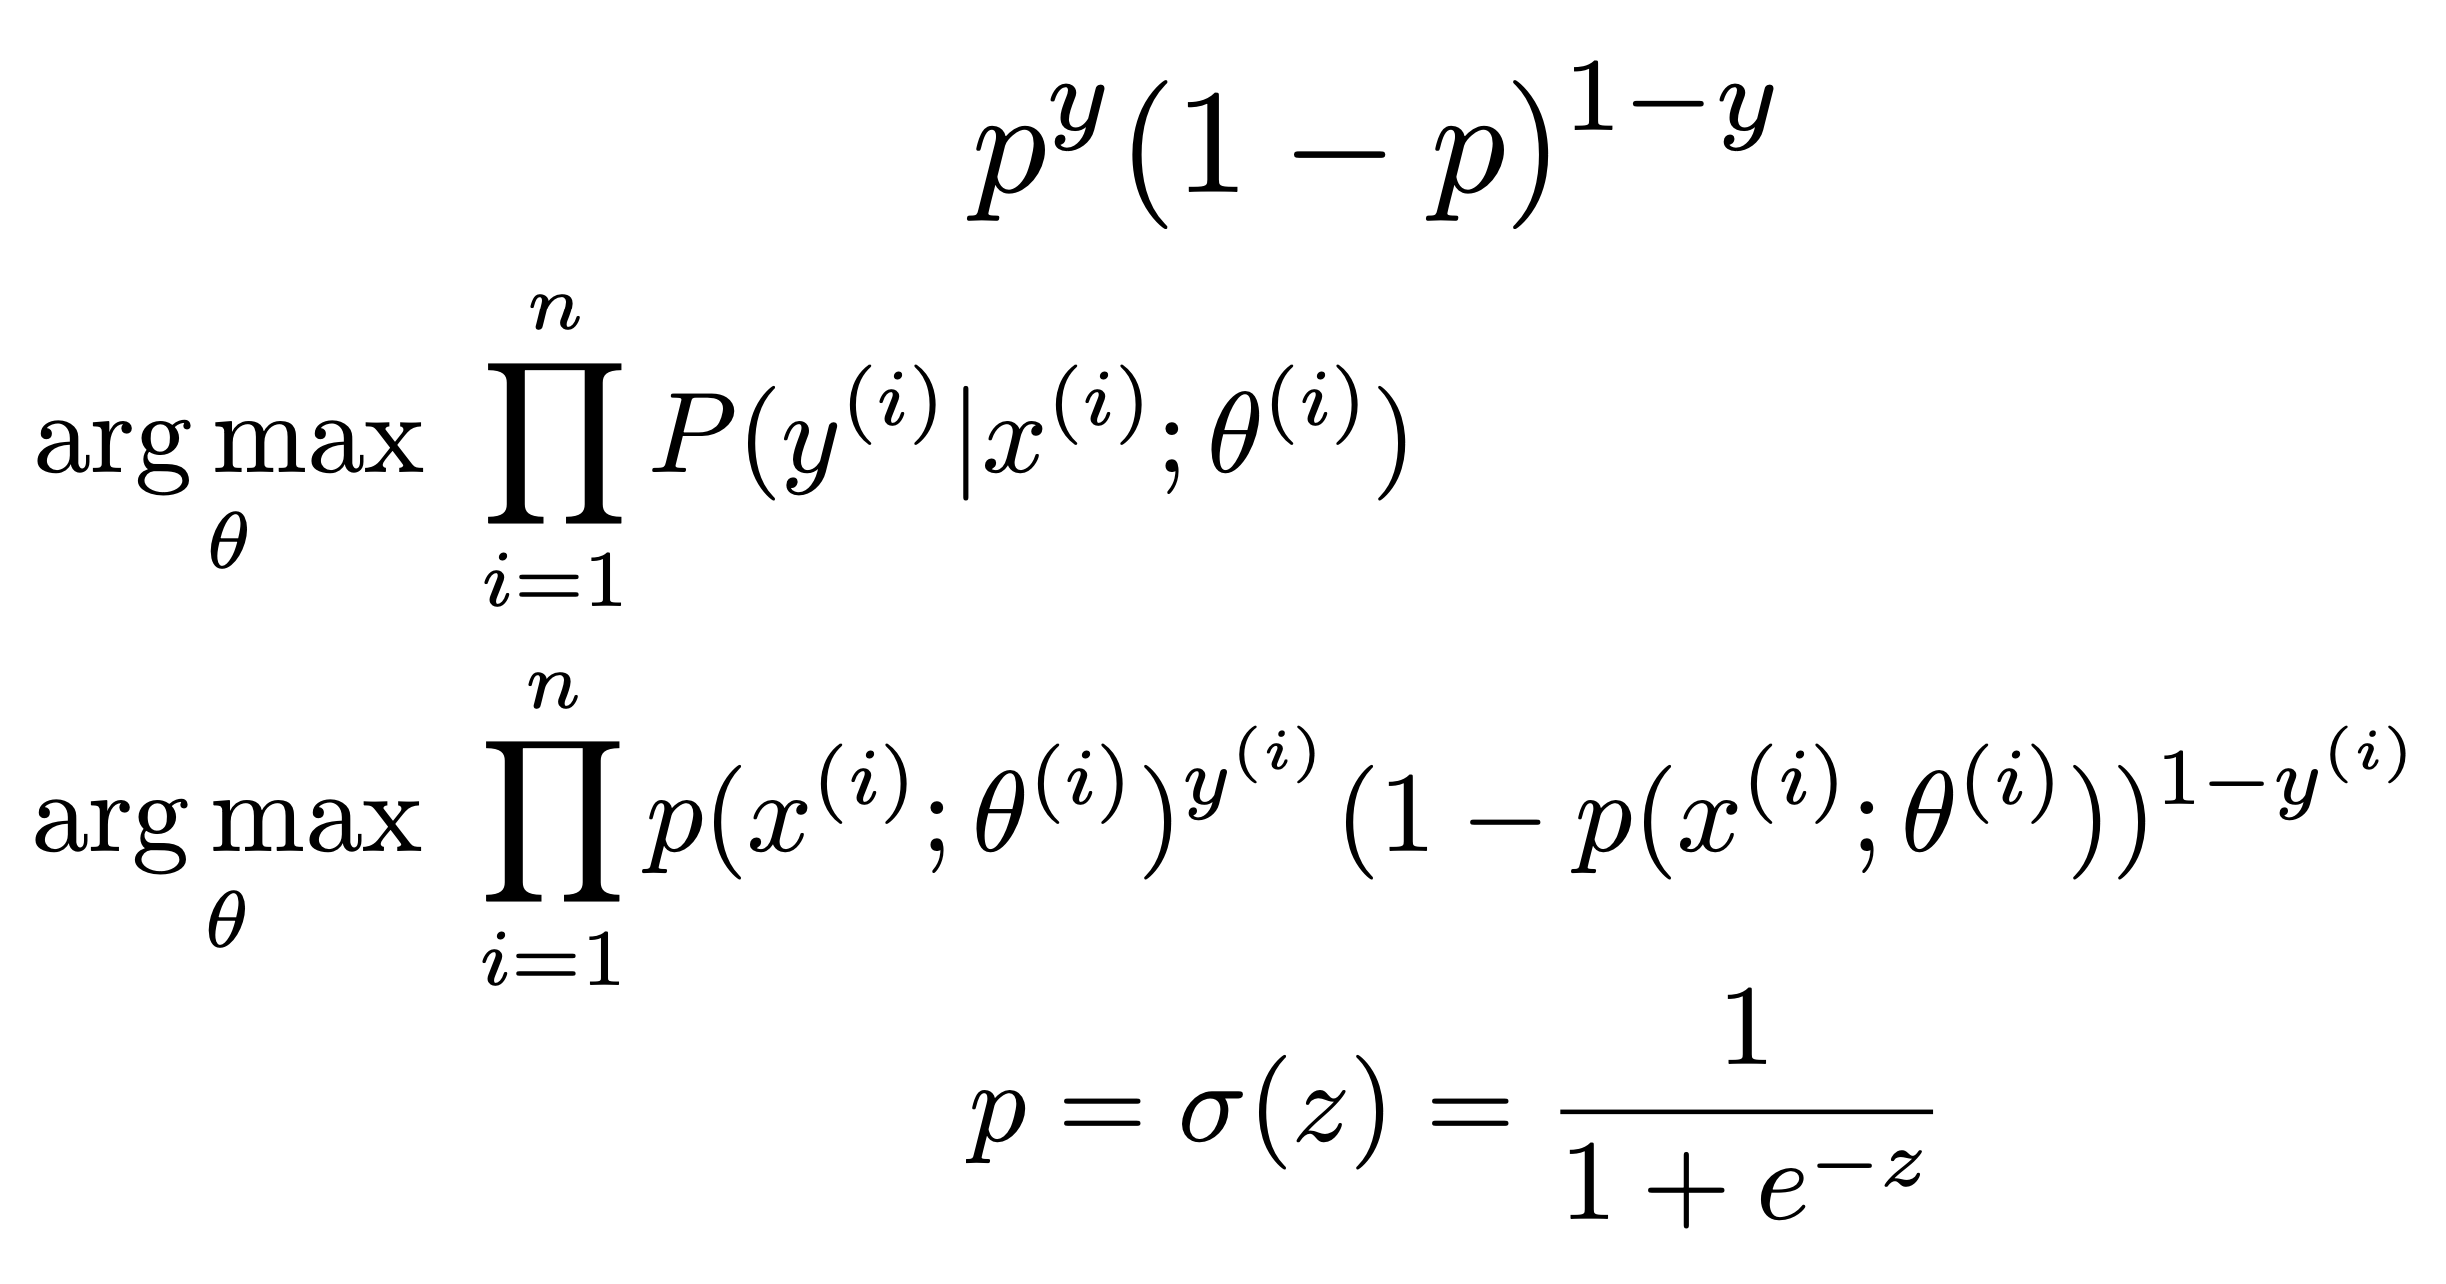

### Cost Function

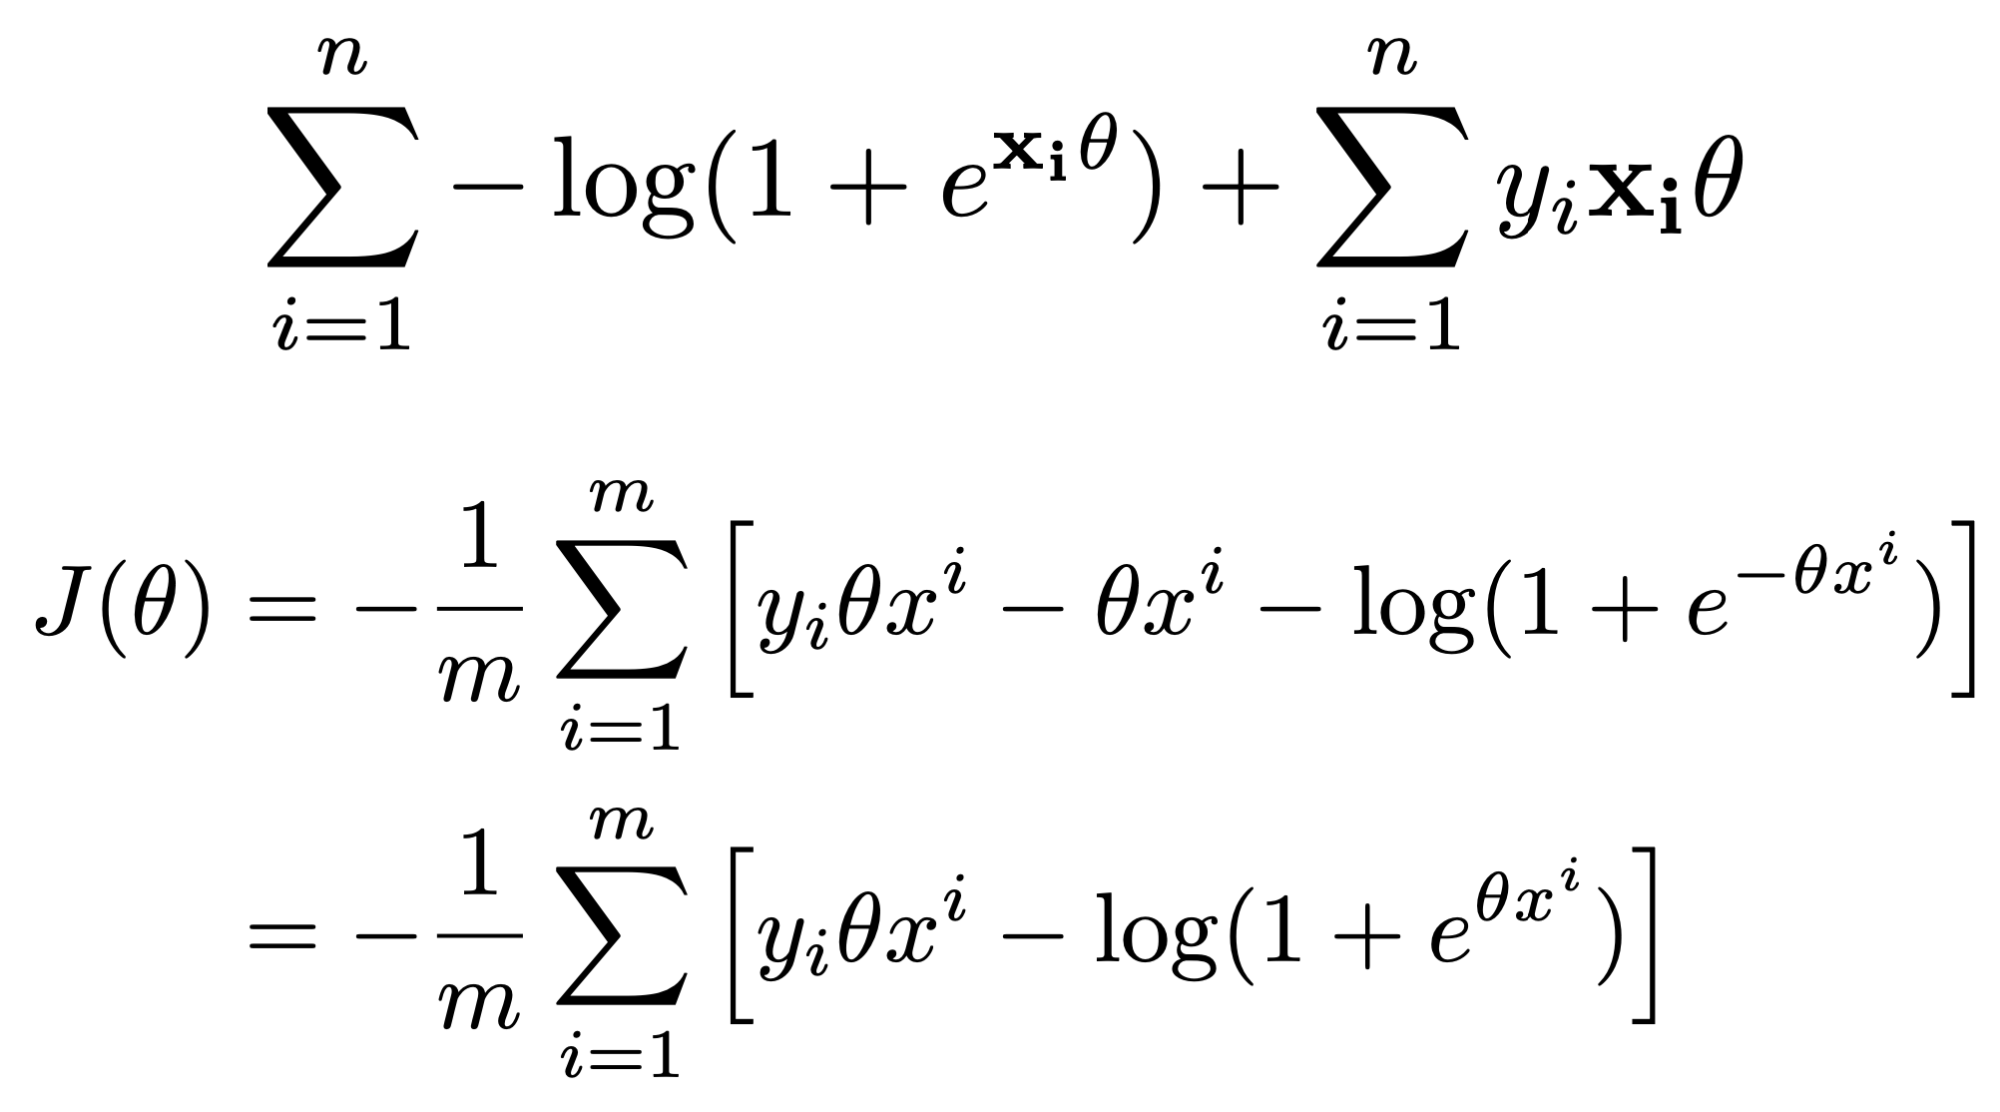

### Partial Derivative of MLE

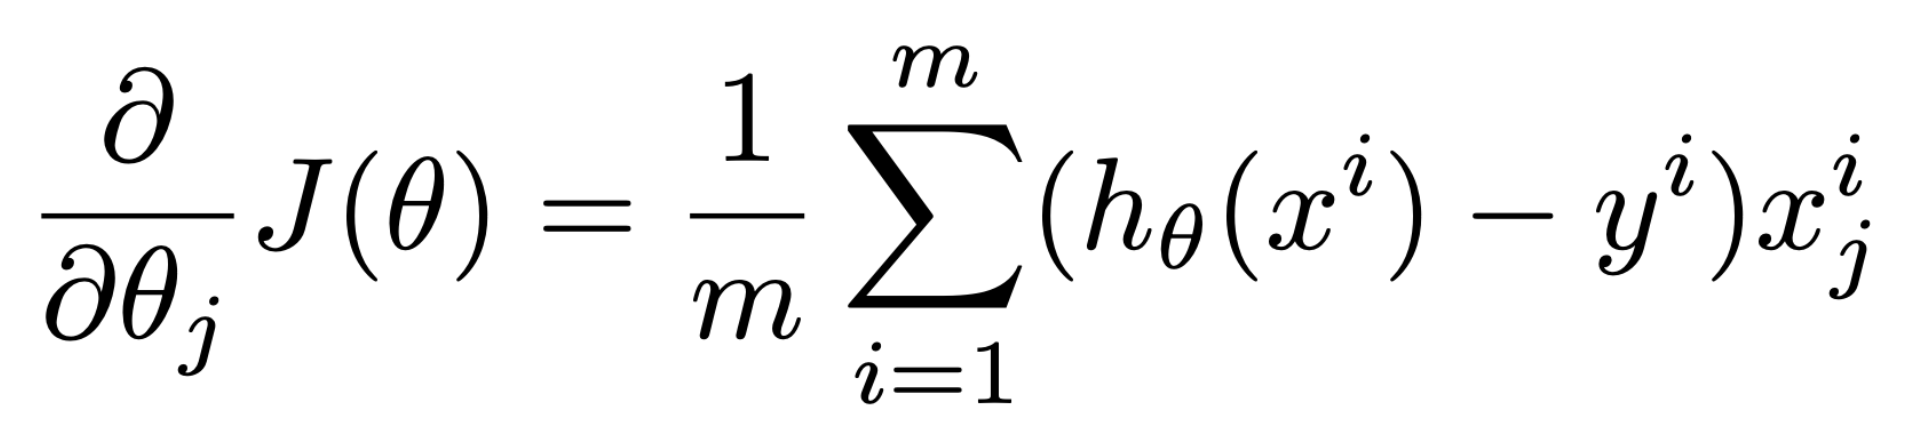

In [1]:
import pandas as pd
import numpy as np

In [2]:
# !wget http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt (Web get 명령어 → install wget으로 설치 필요)
# data_url = 'http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt'
data_url = 'data/uva.txt'

df = pd.read_table(data_url)
df[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [3]:
df.shape

(19583, 11)

In [4]:
df.dtypes

who                      object
Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Country                  object
Education Attainment     object
Major Occupation         object
Marital Status           object
Years on Internet        object
dtype: object

In [5]:
df['Marital Status'].unique()

array(['Other', 'Married', 'Single', 'Divorced', 'Widowed', nan,
       'Separated'], dtype=object)

In [6]:
df.pop('who')     
df.pop('Country')
df.pop('Years on Internet')    # y값 예측에 너무 큰 영향을 줄 것 같아서 제외
df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

### data type을 category로 바꿔주기
- pandas.get_dummies를 바로 써주기 위해

In [7]:
df['Gender'] = df['Gender'].astype('category')
df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income          object
Sexual Preference         object
Education Attainment      object
Major Occupation          object
Marital Status            object
dtype: object

In [8]:
for col in ['Household Income', 'Sexual Preference', 'Education Attainment', 'Major Occupation', 'Marital Status']:
    df[col] = df[col].astype('category')
df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [9]:
df_modified = pd.get_dummies(df)
df_modified[:5]

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [10]:
df_modified.shape

(19583, 38)

In [11]:
df_modified.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

### 결측치 처리

In [12]:
df_modified.loc[pd.isnull(df_modified['Age']), 'Age'] = df_modified['Age'].mean()
df_modified['Age'][pd.isnull(df_modified['Age'])]

Series([], Name: Age, dtype: float64)

In [13]:
df_modified.head()

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Data Split

In [14]:
x_data = df_modified.iloc[:, 1:].values
y_data = df_modified.iloc[:, 0].values.reshape(-1, 1)
x_data.shape, y_data.shape

((19583, 37), (19583, 1))

In [15]:
from sklearn import preprocessing   # Min-Max Standardization

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [16]:
training_idx = np.random.randint(y_data.shape[0], size = int(y_data.shape[0] * 0.8))
test_idx = np.random.randint(y_data.shape[0], size = int(y_data.shape[0] * 0.2))

x_training, x_test = x_data[training_idx, :], x_data[test_idx, :]
y_training, y_test = y_data[training_idx, :], y_data[test_idx, :]

x_training.shape, x_test.shape

((15666, 37), (3916, 37))

In [17]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(fit_intercept = True)
logreg.fit(x_training, y_training.flatten())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
logreg.predict(x_test[:5])

array([0, 0, 0, 0, 0])

In [19]:
logreg.predict_proba(x_test[:5])    # 각 label로 분류될 확률

array([[0.92330013, 0.07669987],
       [0.81341503, 0.18658497],
       [0.69379524, 0.30620476],
       [0.82603161, 0.17396839],
       [0.80209611, 0.19790389]])

In [20]:
# label의 비율 살펴보기

sum(y_data.flatten() == 1), sum(y_data.flatten() == 0)

(4962, 14621)

In [21]:
x_test.shape, y_test.shape

((3916, 37), (3916, 1))

In [22]:
logreg.predict(x_test) == y_test.flatten()

array([False,  True,  True, ...,  True,  True,  True])

In [23]:
sum(logreg.predict(x_test) == y_test.flatten()) / len(y_test)

0.7528089887640449

In [24]:
logreg.predict_proba(x_test)

array([[0.92330013, 0.07669987],
       [0.81341503, 0.18658497],
       [0.69379524, 0.30620476],
       ...,
       [0.70210205, 0.29789795],
       [0.7109561 , 0.2890439 ],
       [0.958597  , 0.041403  ]])

In [25]:
# 판별함수값 계산(값이 0보다 크면 positive, 값이 0보다 작으면 negative)
# 판별함수값의 절대값이 클수록 신뢰정도가 더 높아짐(더 높은 확률로 예측)
logreg.decision_function(x_test[:5])

array([-2.48805436, -1.47235472, -0.81792283, -1.55775942, -1.39944693])